## How well do jobs and skills pay for Data Analysts?



### Methology

1.Evaluate median salary for top 6 data jobs  
2.Find median salary per skill for Data Analysts  
3.visualize for highest paying skills and most demanded skills

In [1]:
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt


dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\TiTO.tech\anaconda3\envs\python_project\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df_US = df[(df['job_country'] == 'United States')].dropna(subset=['salary_year_avg'])

In [3]:
job_titles = df_US['job_title_short'].value_counts().index[:6].tolist()

job_titles

['Data Scientist',
 'Data Analyst',
 'Data Engineer',
 'Senior Data Scientist',
 'Senior Data Engineer',
 'Senior Data Analyst']

In [4]:
df_US_top6 = df_US[df_US['job_title_short'].isin(job_titles)]

In [7]:
job_order = df_US_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index

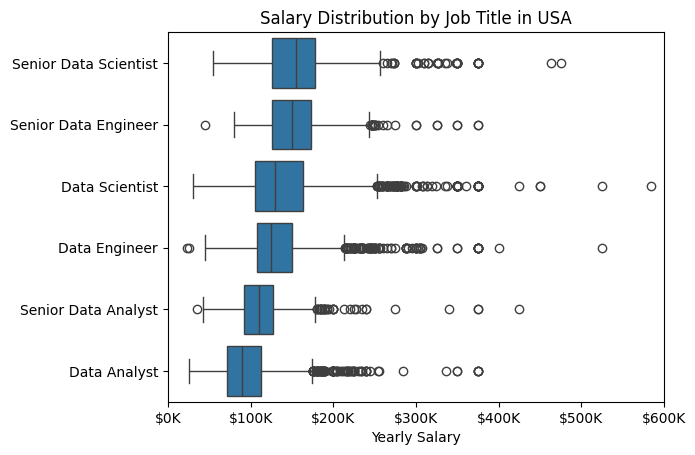

In [9]:
sns.boxplot(data=df_US_top6,x='salary_year_avg',y='job_title_short', order=job_order)

plt.title('Salary Distribution by Job Title in USA')
plt.xlabel('Yearly Salary')
plt.ylabel('')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos:f'${int(x/1000)}K'))
plt.xlim(0, 600000)

plt.show()


## investigate median salary vs skill for data analysts


In [14]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

df_DA_US = df_DA_US.dropna(subset= ['salary_year_avg'])



In [15]:
df_DA_US = df_DA_US.explode('job_skills')

df_DA_US[['salary_year_avg', 'job_skills']].head(5)

,salary_year_avg,job_skills
109,89000.0,python
109,89000.0,r
109,89000.0,alteryx
109,89000.0,tableau
180,90250.0,excel


In [21]:
df_DA_top_pay = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='median',ascending=False)

df_DA_top_pay = df_DA_top_pay.head(10)

In [26]:
df_DA_skills = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='count',ascending=False)

df_DA_skills = df_DA_skills.head(10)

df_DA_skills

,count,median
job_skills,,
sql,2508,91000.00
excel,1808,84392.00
python,1431,97500.00
tableau,1364,92875.00
sas,926,90000.00
r,893,92500.00
power bi,838,90000.00
powerpoint,462,85000.00
word,461,81194.75


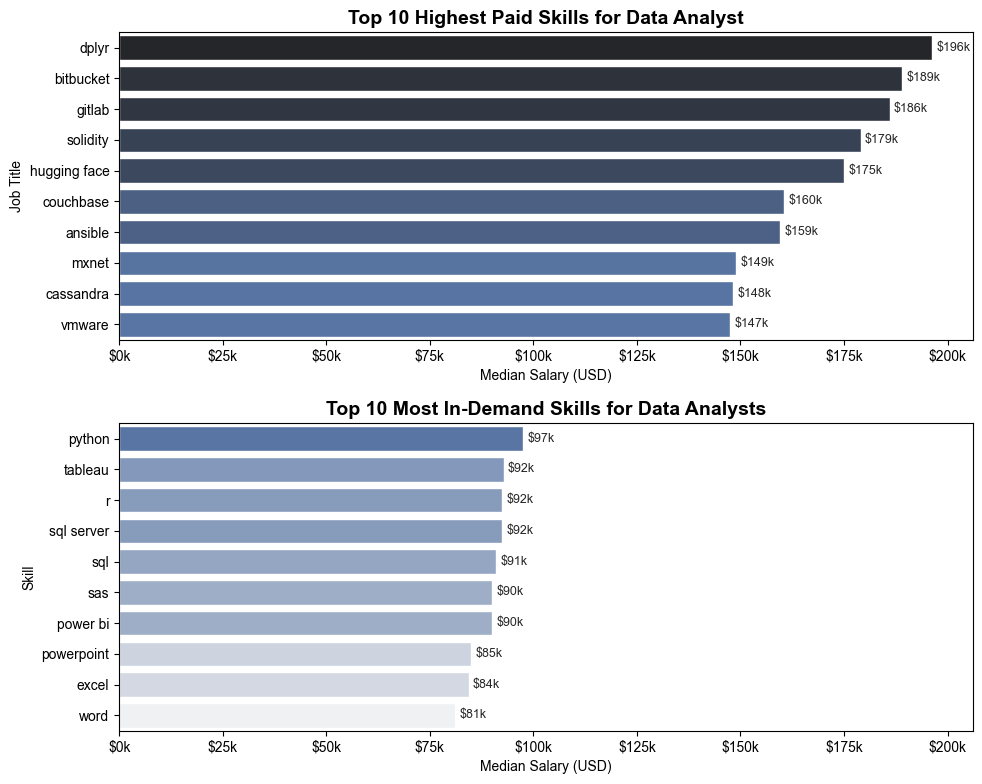

In [27]:
df_DA_US = df_DA_US.explode('job_skills')

df_DA_US[['salary_year_avg', 'job_skills']]
df_DA_US_group = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count','median'])

df_DA_top_pay = df_DA_US_group.sort_values(by='median', ascending=False).head(10)

df_DA_skills = df_DA_US_group.sort_values(by='count',ascending=False).head(10).sort_values(by='median', ascending=False).head(10)

import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

formatter = FuncFormatter(lambda x, _: f'${int(x/1000)}k')

fig, ax = plt.subplots(2, 1, figsize=(10,8))
# Top 10 highest Paid Skills for Data Analysts
sns.set_theme(style="ticks")
sns.barplot(data=df_DA_top_pay, x='median',y=df_DA_top_pay.index,ax=ax[0], hue='median',palette='dark:b_r')
ax[0].legend().remove()

#df_DA_top_pay[::-1].plot(
#    kind='barh',
#    y='median',
 #   ax=ax[0],
  #  legend=False,
   # color='skyblue',
    #edgecolor='black'
#)
ax[0].set_title("Top 10 Highest Paid Skills for Data Analyst" ,  fontsize=14, weight='bold')
ax[0].set_xlabel("Median Salary (USD)")
ax[0].set_ylabel("Job Title")
ax[0].xaxis.set_major_formatter(formatter)  
for container in ax[0].containers:
    ax[0].bar_label(container, labels=[f"${int(v/1000)}k" for v in container.datavalues], fontsize=9, padding=3)

# Top 10 Most In-Demand Skills for Data Analysts
sns.barplot(data=df_DA_skills, x='median',y=df_DA_skills.index,ax=ax[1],hue='median',palette='light:b')
ax[1].legend().remove()
#df_DA_skills[::-1].plot(
#    kind='barh',
 #   y='median',
  #  ax=ax[1],
   # legend=False,
    #color='lightgreen',
   # edgecolor='black'
#)
ax[1].set_title("Top 10 Most In-Demand Skills for Data Analysts" ,  fontsize=14, weight='bold')
ax[1].set_xlabel("Median Salary (USD)")
ax[1].set_ylabel("Skill")
ax[1].xaxis.set_major_formatter(formatter)


ax[1].set_xlim(ax[0].get_xlim())
for container in ax[1].containers:
    ax[1].bar_label(container, labels=[f"${int(v/1000)}k" for v in container.datavalues], fontsize=9, padding=3)

plt.tight_layout()
plt.show()